# Sine Wave Example Recurrent Neural Network - RNN :

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x=np.linspace(0,50,501)

In [10]:
y=np.sin(x)

In [11]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [12]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

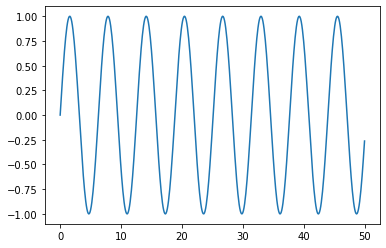

In [13]:
plt.plot(x,y)

In [15]:
df=pd.DataFrame(data=y,index=x,columns=['Sine'])

In [17]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


### Train/Test Split :

In [18]:
len(df)

501

In [19]:
0.1*501

50.1

In [20]:
one_perc=0.1*len(df)

In [21]:
one_perc

50.1

In [22]:
test_point=np.round(one_perc)

In [23]:
test_point

50.0

In [25]:
test_index=int(len(df)-test_point)

In [27]:
test_index                                   #We Got our index , above which would be our training data , and below it would be our test data 

451

In [28]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [29]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [30]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Scaling of Data:

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler=MinMaxScaler()

In [34]:
train_data=scaler.fit_transform(train)

In [36]:
test_data=scaler.transform(test)

## Using TimeSeriesGenerator :

In [37]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
# Let Us define generator:
length=2
batch_size=1
generator=TimeseriesGenerator(train_data,train_data,length=length,batch_size=batch_size)

In [40]:
len(train_data)

451

In [41]:
len(test_data)

50

In [42]:
len(generator)

449

In [43]:
#lets have a look over our first batch :
X,y=generator[0]

In [46]:
X

array([[[0.49999912],
        [0.54991622]]])

In [45]:
y

array([[0.59933458]])

In [49]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(train_data,train_data , length=length, batch_size=1)

In [50]:
X,y=generator[0]

In [51]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571]]])

In [52]:
y

array([[0.92073798]])

In [53]:
length=50
batch_size=1
generator=TimeseriesGenerator(train_data,train_data,length=length,batch_size=batch_size)

In [54]:
X,y=generator[0]

In [55]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [56]:
y

array([[0.02053313]])

## Let's Create The Model :

In [57]:
from tensorflow.keras.models import Sequential

In [58]:
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM

In [59]:
n_features=1

In [63]:
model=Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 14s 35ms/step - loss: 0.0056
Epoch 2/5
401/401 [==============================] - 10s 25ms/step - loss: 3.7521e-04 0s - loss: 2 - ETA: 0s - loss: 3.6983e-
Epoch 3/5
401/401 [==============================] - 11s 27ms/step - loss: 1.2230e-04
Epoch 4/5
401/401 [==============================] - 8s 20ms/step - loss: 1.9408e-04: 2s
Epoch 5/5
401/401 [==============================] - 7s 19ms/step - loss: 2.8809e-04


In [66]:
model.history.history.keys()

dict_keys(['loss'])

In [71]:
loses=model.history.history

In [73]:
losses=pd.DataFrame(model.history.history)

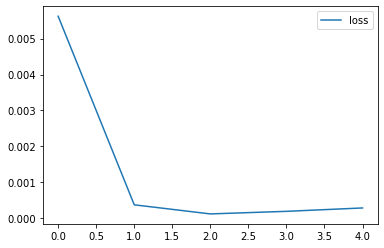

In [74]:
losses.plot()

## Evalutation :

In [75]:
first_eval_batch=train_data[-length:]

In [76]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [77]:
first_eval_batch=first_eval_batch.reshape(1,length,n_features)

In [78]:
model.predict(first_eval_batch)

array([[0.9487258]], dtype=float32)

In [79]:
test_data[0]

array([0.94955134])

In [80]:
#Now let's put this logic in a for loop to predict into the future for the entire test range.

In [81]:
test_predictions=[]

first_eval_batch=train_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)


In [82]:
current_batch.shape

(1, 50, 1)

In [83]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [84]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

### Let's define a clear model for prediction :

In [85]:
test_predictions=[]

first_eval_batch=train_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    
    

In [86]:
test_predictions

[array([0.9487258], dtype=float32),
 array([0.96848434], dtype=float32),
 array([0.98355156], dtype=float32),
 array([0.99327624], dtype=float32),
 array([0.9979404], dtype=float32),
 array([0.99749815], dtype=float32),
 array([0.9916945], dtype=float32),
 array([0.9807439], dtype=float32),
 array([0.9651851], dtype=float32),
 array([0.94474906], dtype=float32),
 array([0.91995585], dtype=float32),
 array([0.8914699], dtype=float32),
 array([0.8594073], dtype=float32),
 array([0.8241293], dtype=float32),
 array([0.7862609], dtype=float32),
 array([0.7461106], dtype=float32),
 array([0.70406926], dtype=float32),
 array([0.66060406], dtype=float32),
 array([0.61609983], dtype=float32),
 array([0.57076365], dtype=float32),
 array([0.524957], dtype=float32),
 array([0.4791551], dtype=float32),
 array([0.4337387], dtype=float32),
 array([0.3889763], dtype=float32),
 array([0.34521708], dtype=float32),
 array([0.30303186], dtype=float32),
 array([0.26291844], dtype=float32),
 array([0.225119

In [87]:
test_data

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [89]:
#As you can see , they are almost same ... now let us take a porper look with inverse transformations :

## Inverse Transformations And Compare :

In [90]:
true_predictions=scaler.inverse_transform(test_predictions)

In [91]:
true_predictions

array([[ 0.89744621],
       [ 0.93696293],
       [ 0.96709713],
       [ 0.98654633],
       [ 0.99587462],
       [ 0.99499009],
       [ 0.9833829 ],
       [ 0.96148182],
       [ 0.93036451],
       [ 0.88949274],
       [ 0.83990673],
       [ 0.78293528],
       [ 0.71881061],
       [ 0.64825513],
       [ 0.57251898],
       [ 0.49221905],
       [ 0.40813701],
       [ 0.32120731],
       [ 0.23219957],
       [ 0.14152793],
       [ 0.04991537],
       [-0.04168771],
       [-0.13251975],
       [-0.22204384],
       [-0.30956159],
       [-0.39393135],
       [-0.47415754],
       [-0.54975482],
       [-0.61971101],
       [-0.68320318],
       [-0.73976751],
       [-0.78858603],
       [-0.82874963],
       [-0.86032449],
       [-0.88304096],
       [-0.89626047],
       [-0.90006737],
       [-0.89496091],
       [-0.88071637],
       [-0.85780885],
       [-0.82701966],
       [-0.78858667],
       [-0.74286278],
       [-0.69077676],
       [-0.63302181],
       [-0

In [92]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [93]:
df1=test.copy()

In [94]:
df1

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [95]:
df1['Predictions']=true_predictions

In [96]:
df1

,Sine,Predictions
45.1,0.899097,0.897446
45.2,0.938307,0.936963
45.3,0.968142,0.967097
45.4,0.988304,0.986546
45.5,0.998591,0.995875
45.6,0.998900,0.994990
45.7,0.989229,0.983383
45.8,0.969673,0.961482
45.9,0.940429,0.930365
46.0,0.901788,0.889493


## Comparison Of Actual Values VS Predcited Values :

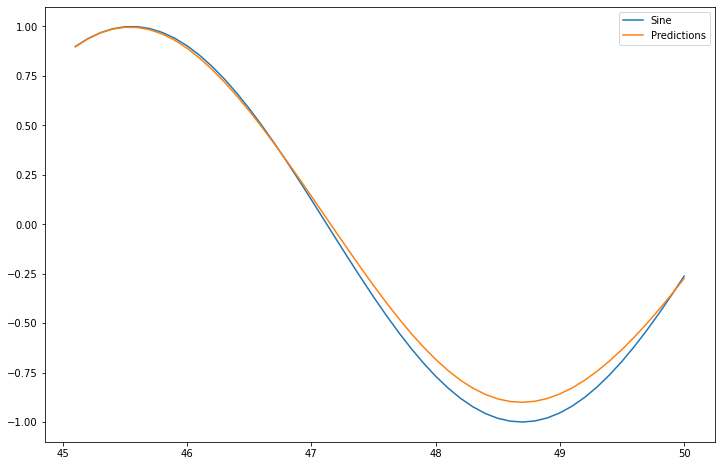

In [102]:

df1.plot(figsize=(12,8))

## Adding Callbacks :

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [105]:
length=49

generator=TimeseriesGenerator(train_data,train_data,batch_size=batch_size,length=length)

validation_gen=TimeseriesGenerator(test_data,test_data,length=length,batch_size=batch_size)

## Working With LSTM's :

In [106]:
model=Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [107]:
model.fit_generator(generator,epochs=20,validation_data=validation_gen,callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 16s 40ms/step - loss: 0.0096 - val_loss: 7.1258e-06
Epoch 2/20
402/402 [==============================] - 21s 52ms/step - loss: 1.2411e-04 - val_loss: 2.2876e-06
Epoch 3/20
402/402 [==============================] - 24s 59ms/step - loss: 2.2423e-04 - val_loss: 2.2060e-05- ETA: - ETA: 7s - loss: 2.8976 - ETA - ETA: 2s - loss: 2.3
Epoch 4/20
402/402 [==============================] - 20s 51ms/step - loss: 1.9990e-04 - val_loss: 2.0085e-05


In [108]:
test_predictions=[]

first_eval_batch=train_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    
    

In [116]:
true_pred1=scaler.inverse_transform(test_predictions)
df2=test.copy()
df2['LSTM Predictions']=true_pred1
df2['Predictions']=true_predictions

In [117]:
df2

,Sine,LSTM Predictions,Predictions
45.1,0.899097,0.876029,0.897446
45.2,0.938307,0.909732,0.936963
45.3,0.968142,0.932585,0.967097
45.4,0.988304,0.944791,0.986546
45.5,0.998591,0.946455,0.995875
45.6,0.998900,0.937770,0.994990
45.7,0.989229,0.919020,0.983383
45.8,0.969673,0.890573,0.961482
45.9,0.940429,0.852869,0.930365
46.0,0.901788,0.806412,0.889493


## Comparison of Sinewave VS Predictions VS LSTM Predictions

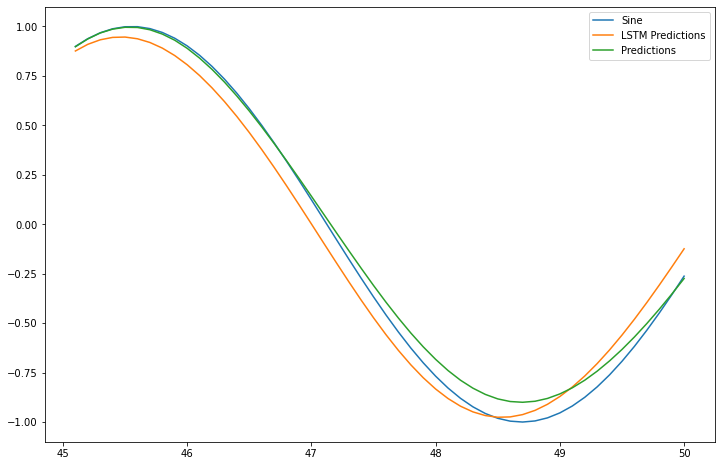

In [120]:
df2.plot(figsize=(12,8))

## Forecasting :

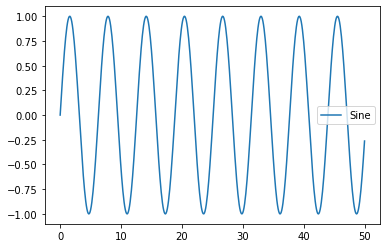

In [121]:
df.plot()

In [123]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [124]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)

In [125]:
model=Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [126]:
model.fit_generator(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 28s 61ms/step - loss: 0.0097 - ETA: 5s  - 
Epoch 2/6
452/452 [==============================] - 27s 59ms/step - loss: 1.3455e-04
Epoch 3/6
452/452 [==============================] - 27s 60ms/step - loss: 0.0010ETA: - ETA: 2s - loss: 0 - ETA: 0s - loss: 
Epoch 4/6
452/452 [==============================] - 26s 58ms/step - loss: 7.2201e-05
Epoch 5/6
452/452 [==============================] - 27s 59ms/step - loss: 6.4479e-05 8s - loss: 8.289 - ET - ET - ETA: 4s - - E
Epoch 6/6
452/452 [==============================] - 28s 62ms/step - loss: 2.7635e-05 3s - l - ETA: 1


In [127]:
forecast=[]

first_eval_batch=train_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(25):                            #To forecast in next 25 points in future
    
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    

In [128]:
forecast_val=scaler.inverse_transform(forecast)

In [129]:
forecast

[array([0.9453116], dtype=float32),
 array([0.96285236], dtype=float32),
 array([0.9751408], dtype=float32),
 array([0.98207647], dtype=float32),
 array([0.9836324], dtype=float32),
 array([0.979847], dtype=float32),
 array([0.97082144], dtype=float32),
 array([0.9567113], dtype=float32),
 array([0.937723], dtype=float32),
 array([0.9141034], dtype=float32),
 array([0.8861359], dtype=float32),
 array([0.8541323], dtype=float32),
 array([0.8184292], dtype=float32),
 array([0.7793839], dtype=float32),
 array([0.73737144], dtype=float32),
 array([0.6927826], dtype=float32),
 array([0.6460239], dtype=float32),
 array([0.5975176], dtype=float32),
 array([0.5477017], dtype=float32),
 array([0.49703136], dtype=float32),
 array([0.445979], dtype=float32),
 array([0.3950359], dtype=float32),
 array([0.3447107], dtype=float32),
 array([0.29552755], dtype=float32),
 array([0.248022], dtype=float32)]

### Let's make a detailed dataframe with index of forecast :

In [130]:
25*0.1

2.5

In [134]:
forecast_index=np.arange(50.1,52.6,step=0.1)

In [135]:
len(forecast_index)

25

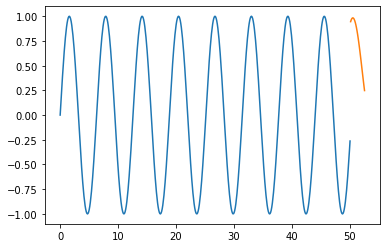

In [138]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

### The reason we saw two different lines here is because these are 2 diffrent dataframes , df- 0  to 50 and forecast - 50.1 to 52.6
The forecast plot line reveals that we were able to somehow plot a continuous series in almost same sequence shape...